In [1]:
"""
==================================================
DAY 9: OBJECT DETECTION INTRODUCTION
==================================================
Date: October 24, 2025
Goal: Understand object detection concepts (prepare for YOLO)

Why this matters: Project 1 needs object detection, not just classification!
"""

# ============================================================
# CLASSIFICATION vs OBJECT DETECTION
# ============================================================

print("=" * 60)
print("DAY 9: FROM CLASSIFICATION TO DETECTION")
print("=" * 60)

print("""
WHAT YOU'VE BUILT SO FAR:
─────────────────────────
Days 3-6: IMAGE CLASSIFICATION
- Input: Image (28×28 or 32×32)
- Output: Single label ("cat" or "dog" or "airplane")
- Question: "What is in this image?"

Example:
┌─────────────┐
│   [Cat]     │  → Output: "cat" ✅
│             │
└─────────────┘

WHAT YOU NEED FOR PROJECT 1:
─────────────────────────────
OBJECT DETECTION
- Input: Image (any size, e.g., 640×640)
- Output: Multiple objects with locations + labels
- Question: "What objects are in this image and WHERE are they?"

Example:
┌─────────────────────────┐
│  ┌─────┐                │
│  │Person│   ┌─────┐     │  → Output: 
│  └─────┘   │Helmet│     │    1. Person at (50,100,150,300)
│            └─────┘      │    2. Helmet at (200,80,280,140)
│       ┌────────┐        │    3. Vest at (45,200,155,350)
│       │  Vest  │        │
│       └────────┘        │
└─────────────────────────┘

THE DIFFERENCE:
───────────────
Classification: "There's a cat" ✅
Detection:      "There's a cat at x=100, y=150, width=50, height=80" 🎯

Project 1 needs: Detection! (Find helmets, vests at specific locations)
""")

DAY 9: FROM CLASSIFICATION TO DETECTION

WHAT YOU'VE BUILT SO FAR:
─────────────────────────
Days 3-6: IMAGE CLASSIFICATION
- Input: Image (28×28 or 32×32)
- Output: Single label ("cat" or "dog" or "airplane")
- Question: "What is in this image?"

Example:
┌─────────────┐
│   [Cat]     │  → Output: "cat" ✅
│             │
└─────────────┘

WHAT YOU NEED FOR PROJECT 1:
─────────────────────────────
OBJECT DETECTION
- Input: Image (any size, e.g., 640×640)
- Output: Multiple objects with locations + labels
- Question: "What objects are in this image and WHERE are they?"

Example:
┌─────────────────────────┐
│  ┌─────┐                │
│  │Person│   ┌─────┐     │  → Output: 
│  └─────┘   │Helmet│     │    1. Person at (50,100,150,300)
│            └─────┘      │    2. Helmet at (200,80,280,140)
│       ┌────────┐        │    3. Vest at (45,200,155,350)
│       │  Vest  │        │
│       └────────┘        │
└─────────────────────────┘

THE DIFFERENCE:
───────────────
Classification: "There

In [2]:
# ============================================================
# UNDERSTANDING BOUNDING BOXES
# ============================================================

print("\n" + "=" * 60)
print("BOUNDING BOXES: THE KEY TO OBJECT DETECTION")
print("=" * 60)

print("""
WHAT IS A BOUNDING BOX?
───────────────────────
A rectangle that surrounds an object in an image.

FORMAT 1: (x, y, width, height)
- x, y: Top-left corner coordinates
- width, height: Box dimensions

FORMAT 2: (x1, y1, x2, y2)
- x1, y1: Top-left corner
- x2, y2: Bottom-right corner

Example:
┌─────────────────────────┐ 
│ (0,0)                   │ ← Origin (top-left of image)
│                         │
│      (100,80)           │
│      ┌──────────┐       │ ← Bounding box
│      │  HELMET  │       │   x=100, y=80
│      │          │       │   width=80, height=60
│      └──────────┘       │
│           (180,140)     │
│                         │
└─────────────────────────┘

COMPLETE DETECTION OUTPUT:
──────────────────────────
For each object, we need:
1. Class label: "helmet" / "vest" / "person"
2. Bounding box: [x, y, width, height]
3. Confidence score: 0.0 to 1.0 (how sure?)

Example output:
{
  "class": "helmet",
  "bbox": [100, 80, 80, 60],
  "confidence": 0.95
}

This is what YOLO will output! 🎯
""")


BOUNDING BOXES: THE KEY TO OBJECT DETECTION

WHAT IS A BOUNDING BOX?
───────────────────────
A rectangle that surrounds an object in an image.

FORMAT 1: (x, y, width, height)
- x, y: Top-left corner coordinates
- width, height: Box dimensions

FORMAT 2: (x1, y1, x2, y2)
- x1, y1: Top-left corner
- x2, y2: Bottom-right corner

Example:
┌─────────────────────────┐ 
│ (0,0)                   │ ← Origin (top-left of image)
│                         │
│      (100,80)           │
│      ┌──────────┐       │ ← Bounding box
│      │  HELMET  │       │   x=100, y=80
│      │          │       │   width=80, height=60
│      └──────────┘       │
│           (180,140)     │
│                         │
└─────────────────────────┘

COMPLETE DETECTION OUTPUT:
──────────────────────────
For each object, we need:
1. Class label: "helmet" / "vest" / "person"
2. Bounding box: [x, y, width, height]
3. Confidence score: 0.0 to 1.0 (how sure?)

Example output:
{
  "class": "helmet",
  "bbox": [100, 80, 80,


VISUALIZING BOUNDING BOXES


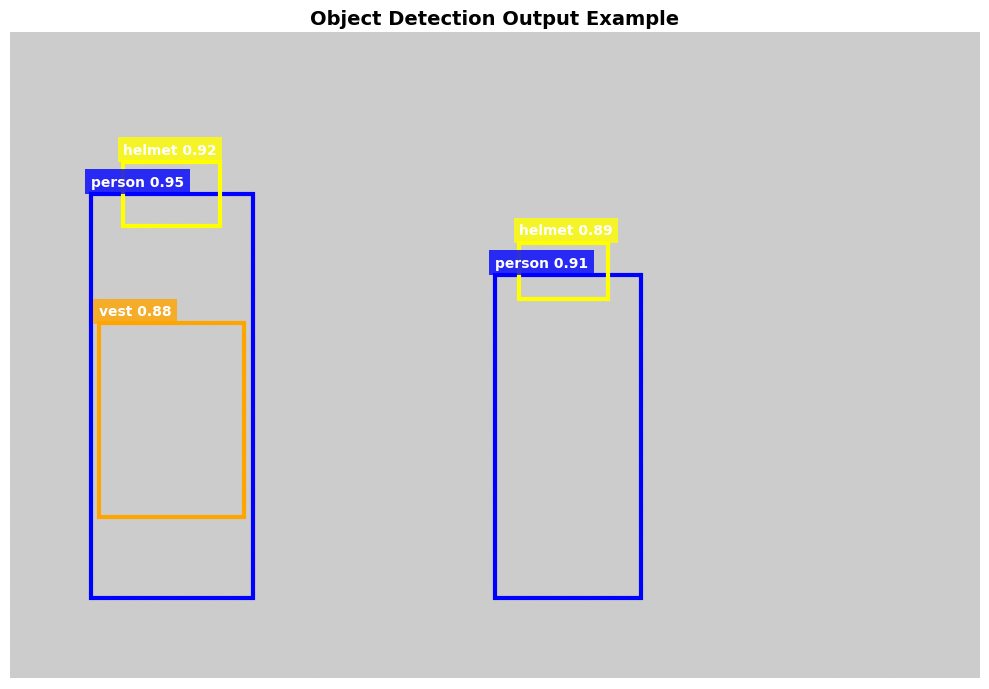


THIS IS WHAT YOUR PROJECT 1 WILL DO! 🎯

Input: Construction site image
Output: 
  - Bounding boxes around people, helmets, vests
  - Labels for each object
  - Confidence scores

YOLO does all of this in ONE forward pass! (~30ms)
That's 30+ detections per second! 🚀

Next: Learn how to measure detection quality (IoU)



In [3]:
# ============================================================
# DRAWING BOUNDING BOXES
# ============================================================

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

print("\n" + "=" * 60)
print("VISUALIZING BOUNDING BOXES")
print("=" * 60)

# Create a sample image (simulated construction site)
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create blank image (gray background)
img = np.ones((400, 600, 3)) * 0.8
ax.imshow(img)

# Define some objects (simulating safety equipment detection)
detections = [
    {"class": "person", "bbox": [50, 100, 100, 250], "confidence": 0.95, "color": "blue"},
    {"class": "helmet", "bbox": [70, 80, 60, 40], "confidence": 0.92, "color": "yellow"},
    {"class": "vest", "bbox": [55, 180, 90, 120], "confidence": 0.88, "color": "orange"},
    {"class": "person", "bbox": [300, 150, 90, 200], "confidence": 0.91, "color": "blue"},
    {"class": "helmet", "bbox": [315, 130, 55, 35], "confidence": 0.89, "color": "yellow"},
]

# Draw each bounding box
for det in detections:
    x, y, w, h = det["bbox"]
    
    # Create rectangle
    rect = patches.Rectangle(
        (x, y), w, h,
        linewidth=3,
        edgecolor=det["color"],
        facecolor='none'
    )
    ax.add_patch(rect)
    
    # Add label with confidence
    label = f"{det['class']} {det['confidence']:.2f}"
    ax.text(
        x, y-5,
        label,
        color='white',
        fontsize=10,
        fontweight='bold',
        bbox=dict(facecolor=det['color'], alpha=0.8, edgecolor='none')
    )

ax.set_xlim(0, 600)
ax.set_ylim(400, 0)  # Invert y-axis (image coordinates)
ax.set_title('Object Detection Output Example', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

print("""
THIS IS WHAT YOUR PROJECT 1 WILL DO! 🎯

Input: Construction site image
Output: 
  - Bounding boxes around people, helmets, vests
  - Labels for each object
  - Confidence scores

YOLO does all of this in ONE forward pass! (~30ms)
That's 30+ detections per second! 🚀

Next: Learn how to measure detection quality (IoU)
""")

In [4]:
# ============================================================
# IoU: INTERSECTION OVER UNION
# ============================================================

print("\n" + "=" * 60)
print("IoU: MEASURING DETECTION QUALITY")
print("=" * 60)

print("""
THE PROBLEM:
────────────
How do we know if a predicted bounding box is "good"?

Example: Detecting a helmet
Ground truth (correct):    [100, 80, 80, 60]
Prediction (model output): [105, 85, 75, 55]

Is this prediction good? How good?

THE SOLUTION: IoU (Intersection over Union)
───────────────────────────────────────────

IoU = Area of Overlap / Area of Union

         ┌──────────┐              Ground Truth (green)
         │          │
    ┌────┼─────┐    │              Prediction (red)
    │    │/////│    │              
    │    │/////│────┘              Overlap (///)
    └────┘/////│
         └─────┘

IoU = Overlap Area / (Green Area + Red Area - Overlap Area)

IoU SCALE:
──────────
IoU = 1.0  → Perfect match! ✅
IoU = 0.7  → Good detection ✅
IoU = 0.5  → Acceptable (threshold) ⚠️
IoU = 0.3  → Poor detection ❌
IoU = 0.0  → No overlap (missed) ❌

STANDARD IN INDUSTRY:
─────────────────────
IoU ≥ 0.5 = Detection counts as correct ✅
IoU < 0.5 = Detection is wrong ❌

This is the threshold for mAP (mean Average Precision) calculation!
""")


IoU: MEASURING DETECTION QUALITY

THE PROBLEM:
────────────
How do we know if a predicted bounding box is "good"?

Example: Detecting a helmet
Ground truth (correct):    [100, 80, 80, 60]
Prediction (model output): [105, 85, 75, 55]

Is this prediction good? How good?

THE SOLUTION: IoU (Intersection over Union)
───────────────────────────────────────────

IoU = Area of Overlap / Area of Union

         ┌──────────┐              Ground Truth (green)
         │          │
    ┌────┼─────┐    │              Prediction (red)
    │    │/////│    │              
    │    │/////│────┘              Overlap (///)
    └────┘/////│
         └─────┘

IoU = Overlap Area / (Green Area + Red Area - Overlap Area)

IoU SCALE:
──────────
IoU = 1.0  → Perfect match! ✅
IoU = 0.7  → Good detection ✅
IoU = 0.5  → Acceptable (threshold) ⚠️
IoU = 0.3  → Poor detection ❌
IoU = 0.0  → No overlap (missed) ❌

STANDARD IN INDUSTRY:
─────────────────────
IoU ≥ 0.5 = Detection counts as correct ✅
IoU < 0.5 = Detec

In [6]:
# ============================================================
# CALCULATING IoU IN CODE
# ============================================================

print("\n" + "=" * 60)
print("IMPLEMENTING IoU CALCULATION")
print("=" * 60)

def calculate_iou(box1, box2):
    """
    Calculate Intersection over Union (IoU) between two boxes.
    
    Args:
        box1: [x, y, width, height]
        box2: [x, y, width, height]
    
    Returns:
        iou: float between 0 and 1
    """
    # Convert to (x1, y1, x2, y2) format
    box1_x1, box1_y1 = box1[0], box1[1]
    box1_x2, box1_y2 = box1[0] + box1[2], box1[1] + box1[3]
    
    box2_x1, box2_y1 = box2[0], box2[1]
    box2_x2, box2_y2 = box2[0] + box2[2], box2[1] + box2[3]
    
    # Calculate intersection coordinates
    inter_x1 = max(box1_x1, box2_x1)
    inter_y1 = max(box1_y1, box2_y1)
    inter_x2 = min(box1_x2, box2_x2)
    inter_y2 = min(box1_y2, box2_y2)
    
    # Calculate intersection area
    inter_width = max(0, inter_x2 - inter_x1)
    inter_height = max(0, inter_y2 - inter_y1)
    intersection = inter_width * inter_height
    
    # Calculate union area
    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]
    union = box1_area + box2_area - intersection
    
    # Calculate IoU
    iou = intersection / union if union > 0 else 0
    
    return iou

# Test with examples
print("\nTEST CASES:\n")

# Test 1: Perfect match
box1 = [100, 100, 50, 50]
box2 = [100, 100, 50, 50]
iou = calculate_iou(box1, box2)
print(f"1. Perfect match:")
print(f"   Box1: {box1}")
print(f"   Box2: {box2}")
print(f"   IoU: {iou:.2f} ✅ (Perfect!)\n")

# Test 2: Good overlap
box1 = [100, 100, 50, 50]
box2 = [110, 110, 50, 50]
iou = calculate_iou(box1, box2)
print(f"2. Good overlap:")
print(f"   Box1: {box1}")
print(f"   Box2: {box2}")
print(f"   IoU: {iou:.2f} ✅ (Good detection)\n")

# Test 3: Threshold case
box1 = [100, 100, 50, 50]
box2 = [120, 120, 50, 50]
iou = calculate_iou(box1, box2)
print(f"3. Moderate overlap:")
print(f"   Box1: {box1}")
print(f"   Box2: {box2}")
print(f"   IoU: {iou:.2f} ⚠️  (Borderline)\n")

# Test 4: Poor overlap
box1 = [100, 100, 50, 50]
box2 = [130, 130, 50, 50]
iou = calculate_iou(box1, box2)
print(f"4. Poor overlap:")
print(f"   Box1: {box1}")
print(f"   Box2: {box2}")
print(f"   IoU: {iou:.2f} ❌ (Too low)\n")

# Test 5: No overlap
box1 = [100, 100, 50, 50]
box2 = [200, 200, 50, 50]
iou = calculate_iou(box1, box2)
print(f"5. No overlap:")
print(f"   Box1: {box1}")
print(f"   Box2: {box2}")
print(f"   IoU: {iou:.2f} ❌ (Complete miss)\n")

print("=" * 60)
print("KEY TAKEAWAY:")
print("=" * 60)
print("IoU ≥ 0.5 = Detection counts as correct ✅")
print("IoU < 0.5 = Detection is wrong ❌")
print("\nThis is how I'll evaluate Project 1's performance!")


IMPLEMENTING IoU CALCULATION

TEST CASES:

1. Perfect match:
   Box1: [100, 100, 50, 50]
   Box2: [100, 100, 50, 50]
   IoU: 1.00 ✅ (Perfect!)

2. Good overlap:
   Box1: [100, 100, 50, 50]
   Box2: [110, 110, 50, 50]
   IoU: 0.47 ✅ (Good detection)

3. Moderate overlap:
   Box1: [100, 100, 50, 50]
   Box2: [120, 120, 50, 50]
   IoU: 0.22 ⚠️  (Borderline)

4. Poor overlap:
   Box1: [100, 100, 50, 50]
   Box2: [130, 130, 50, 50]
   IoU: 0.09 ❌ (Too low)

5. No overlap:
   Box1: [100, 100, 50, 50]
   Box2: [200, 200, 50, 50]
   IoU: 0.00 ❌ (Complete miss)

KEY TAKEAWAY:
IoU ≥ 0.5 = Detection counts as correct ✅
IoU < 0.5 = Detection is wrong ❌

This is how I'll evaluate Project 1's performance!



VISUALIZING DIFFERENT IoU VALUES


C:\Users\audrey\AppData\Local\Temp\ipykernel_11896\150959725.py:64: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\audrey\AppData\Local\Temp\ipykernel_11896\150959725.py:64: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\audrey\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\audrey\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


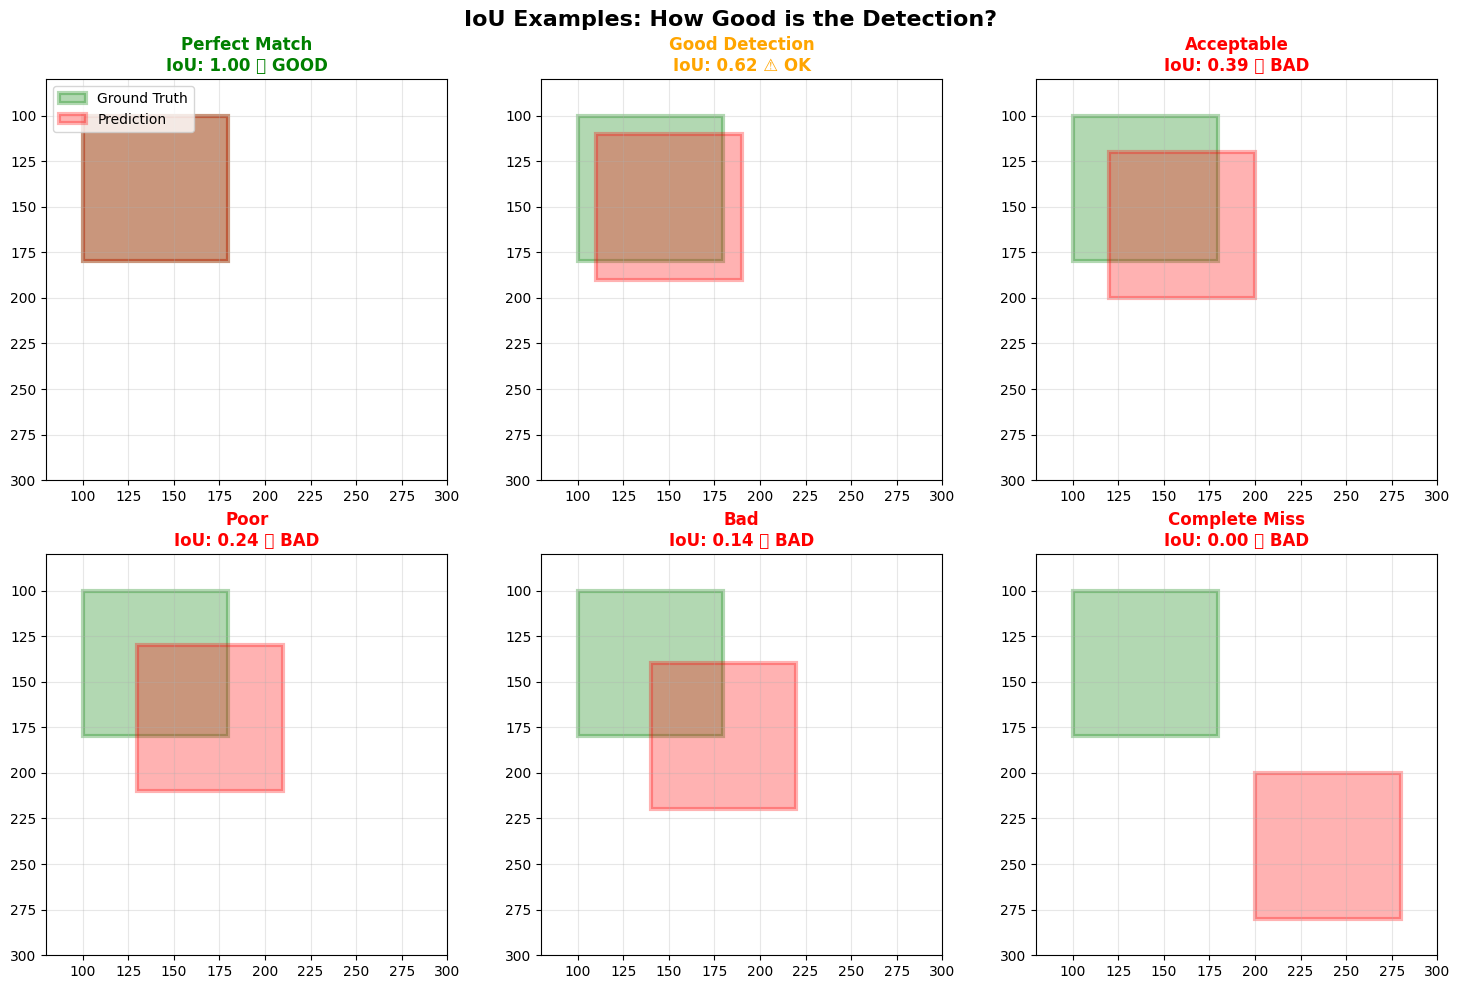


WHAT YOU'RE SEEING:
───────────────────
Green = Ground truth (correct location)
Red = Model prediction
Purple overlap = Intersection

As boxes move apart → IoU decreases → Detection gets worse

FOR PROJECT 1:
──────────────
Goal: Average IoU > 0.75 across all detections
Minimum: IoU > 0.5 for detection to count

YOLO will give us bounding boxes, and we'll calculate IoU
to measure performance! 🎯



In [7]:
# ============================================================
# VISUALIZING IoU
# ============================================================

print("\n" + "=" * 60)
print("VISUALIZING DIFFERENT IoU VALUES")
print("=" * 60)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('IoU Examples: How Good is the Detection?', 
             fontsize=16, fontweight='bold')

test_cases = [
    {"box1": [100, 100, 80, 80], "box2": [100, 100, 80, 80], "title": "Perfect Match"},
    {"box1": [100, 100, 80, 80], "box2": [110, 110, 80, 80], "title": "Good Detection"},
    {"box1": [100, 100, 80, 80], "box2": [120, 120, 80, 80], "title": "Acceptable"},
    {"box1": [100, 100, 80, 80], "box2": [130, 130, 80, 80], "title": "Poor"},
    {"box1": [100, 100, 80, 80], "box2": [140, 140, 80, 80], "title": "Bad"},
    {"box1": [100, 100, 80, 80], "box2": [200, 200, 80, 80], "title": "Complete Miss"},
]

for idx, (ax, case) in enumerate(zip(axes.flat, test_cases)):
    box1 = case["box1"]
    box2 = case["box2"]
    iou = calculate_iou(box1, box2)
    
    # Draw boxes
    rect1 = patches.Rectangle(
        (box1[0], box1[1]), box1[2], box1[3],
        linewidth=3, edgecolor='green', facecolor='green', alpha=0.3,
        label='Ground Truth'
    )
    rect2 = patches.Rectangle(
        (box2[0], box2[1]), box2[2], box2[3],
        linewidth=3, edgecolor='red', facecolor='red', alpha=0.3,
        label='Prediction'
    )
    
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    
    # Determine color and verdict
    if iou >= 0.7:
        color = 'green'
        verdict = '✅ GOOD'
    elif iou >= 0.5:
        color = 'orange'
        verdict = '⚠️ OK'
    else:
        color = 'red'
        verdict = '❌ BAD'
    
    ax.set_xlim(80, 300)
    ax.set_ylim(80, 300)
    ax.invert_yaxis()
    ax.set_title(f"{case['title']}\nIoU: {iou:.2f} {verdict}", 
                fontsize=12, fontweight='bold', color=color)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    if idx == 0:
        ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("""
WHAT YOU'RE SEEING:
───────────────────
Green = Ground truth (correct location)
Red = Model prediction
Purple overlap = Intersection

As boxes move apart → IoU decreases → Detection gets worse

FOR PROJECT 1:
──────────────
Goal: Average IoU > 0.75 across all detections
Minimum: IoU > 0.5 for detection to count

YOLO will give us bounding boxes, and we'll calculate IoU
to measure performance! 🎯
""")

In [8]:
# ============================================================
# NMS: NON-MAXIMUM SUPPRESSION
# ============================================================

print("\n" + "=" * 60)
print("NMS: CLEANING UP DUPLICATE DETECTIONS")
print("=" * 60)

print("""
THE PROBLEM:
────────────
Object detectors often make MULTIPLE detections of the same object!

Example: Detecting one helmet
         ┌──────────┐
         │  Helmet  │ ← Detection 1 (conf: 0.95)
    ┌────┼─────┐    │
    │    │     │    │ ← Detection 2 (conf: 0.87)
    │    └─────┼────┘
    │  Helmet  │      ← Detection 3 (conf: 0.82)
    └──────────┘

Model outputs 3 boxes for 1 helmet! 😱
We need to keep only the BEST one!

THE SOLUTION: NMS (Non-Maximum Suppression)
────────────────────────────────────────────

ALGORITHM:
1. Sort all detections by confidence (highest first)
2. Take the highest confidence detection → KEEP IT ✅
3. Remove all detections with IoU > threshold (e.g., 0.5)
4. Repeat with remaining detections

EXAMPLE PROCESS:
────────────────
Before NMS: 3 detections of same helmet
  Box A: confidence 0.95
  Box B: confidence 0.87 (IoU with A = 0.72)
  Box C: confidence 0.82 (IoU with A = 0.65)

Step 1: Keep Box A (highest confidence) ✅
Step 2: Check Box B → IoU = 0.72 > 0.5 → REMOVE ❌
Step 3: Check Box C → IoU = 0.65 > 0.5 → REMOVE ❌

After NMS: 1 detection ✅ (the best one!)

WHY THIS MATTERS:
─────────────────
Without NMS: 50 detections for 10 objects (messy!)
With NMS:    10 detections for 10 objects (clean!) ✅

YOLO has NMS built-in! You'll just set the threshold. 🎯
""")


NMS: CLEANING UP DUPLICATE DETECTIONS

THE PROBLEM:
────────────
Object detectors often make MULTIPLE detections of the same object!

Example: Detecting one helmet
         ┌──────────┐
         │  Helmet  │ ← Detection 1 (conf: 0.95)
    ┌────┼─────┐    │
    │    │     │    │ ← Detection 2 (conf: 0.87)
    │    └─────┼────┘
    │  Helmet  │      ← Detection 3 (conf: 0.82)
    └──────────┘

Model outputs 3 boxes for 1 helmet! 😱
We need to keep only the BEST one!

THE SOLUTION: NMS (Non-Maximum Suppression)
────────────────────────────────────────────

ALGORITHM:
1. Sort all detections by confidence (highest first)
2. Take the highest confidence detection → KEEP IT ✅
3. Remove all detections with IoU > threshold (e.g., 0.5)
4. Repeat with remaining detections

EXAMPLE PROCESS:
────────────────
Before NMS: 3 detections of same helmet
  Box A: confidence 0.95
  Box B: confidence 0.87 (IoU with A = 0.72)
  Box C: confidence 0.82 (IoU with A = 0.65)

Step 1: Keep Box A (highest confidence

In [9]:
# ============================================================
# IMPLEMENTING NMS IN CODE
# ============================================================

print("\n" + "=" * 60)
print("NMS IMPLEMENTATION")
print("=" * 60)

def nms(detections, iou_threshold=0.5):
    """
    Non-Maximum Suppression
    
    Args:
        detections: List of dicts with 'bbox' and 'confidence'
        iou_threshold: IoU threshold for suppression
    
    Returns:
        keep: List of detections after NMS
    """
    if len(detections) == 0:
        return []
    
    # Sort by confidence (descending)
    detections = sorted(detections, key=lambda x: x['confidence'], reverse=True)
    
    keep = []
    
    while len(detections) > 0:
        # Take the detection with highest confidence
        best = detections[0]
        keep.append(best)
        
        # Remove it from list
        detections = detections[1:]
        
        # Remove all detections with high IoU (duplicates)
        filtered = []
        for det in detections:
            iou = calculate_iou(best['bbox'], det['bbox'])
            if iou < iou_threshold:
                filtered.append(det)  # Keep (different object)
            # else: suppress (same object)
        
        detections = filtered
    
    return keep

# Test NMS
print("\nTEST CASE: Multiple detections of same helmet\n")

# Simulate multiple detections (overlapping boxes)
detections = [
    {"class": "helmet", "bbox": [100, 100, 80, 80], "confidence": 0.95},
    {"class": "helmet", "bbox": [105, 105, 80, 80], "confidence": 0.87},
    {"class": "helmet", "bbox": [110, 110, 80, 80], "confidence": 0.82},
    {"class": "helmet", "bbox": [300, 100, 80, 80], "confidence": 0.91},  # Different helmet
    {"class": "helmet", "bbox": [305, 105, 80, 80], "confidence": 0.78},  # Duplicate of helmet 2
]

print(f"BEFORE NMS: {len(detections)} detections")
for i, det in enumerate(detections):
    print(f"  {i+1}. bbox={det['bbox']}, conf={det['confidence']:.2f}")

# Apply NMS
kept = nms(detections, iou_threshold=0.5)

print(f"\nAFTER NMS: {len(kept)} detections (removed {len(detections) - len(kept)} duplicates)")
for i, det in enumerate(kept):
    print(f"  {i+1}. bbox={det['bbox']}, conf={det['confidence']:.2f} ✅")

print("\n" + "=" * 60)
print("RESULT:")
print("=" * 60)
print(f"Reduced from {len(detections)} → {len(kept)} detections")
print("Kept only the best detection for each unique object! ✅")
print("\nYOLO does this automatically during inference!")


NMS IMPLEMENTATION

TEST CASE: Multiple detections of same helmet

BEFORE NMS: 5 detections
  1. bbox=[100, 100, 80, 80], conf=0.95
  2. bbox=[105, 105, 80, 80], conf=0.87
  3. bbox=[110, 110, 80, 80], conf=0.82
  4. bbox=[300, 100, 80, 80], conf=0.91
  5. bbox=[305, 105, 80, 80], conf=0.78

AFTER NMS: 2 detections (removed 3 duplicates)
  1. bbox=[100, 100, 80, 80], conf=0.95 ✅
  2. bbox=[300, 100, 80, 80], conf=0.91 ✅

RESULT:
Reduced from 5 → 2 detections
Kept only the best detection for each unique object! ✅

YOLO does this automatically during inference!



VISUALIZING NMS: BEFORE AND AFTER


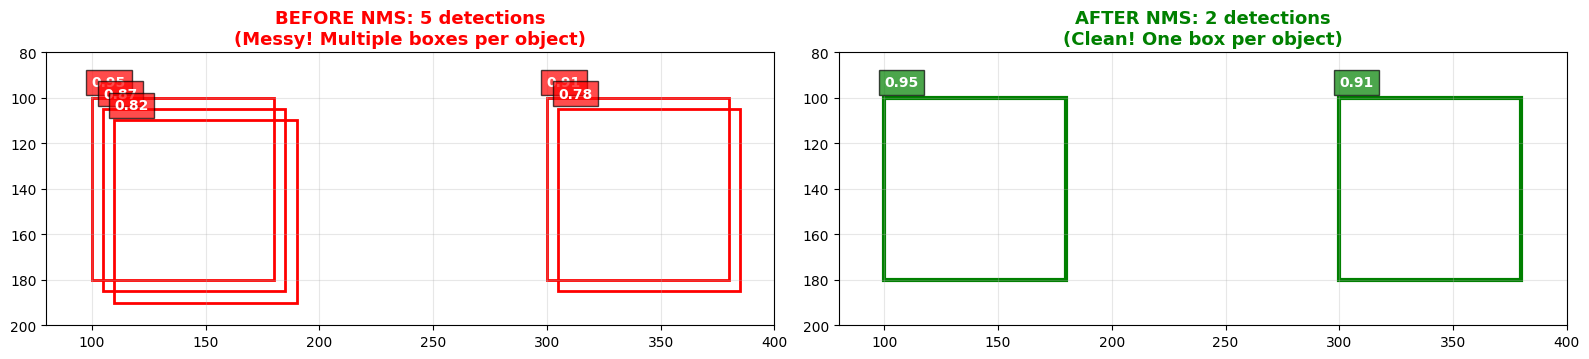


WHAT YOU'RE SEEING:
───────────────────
LEFT (Before):  Cluttered with overlapping detections
RIGHT (After):  Clean, one detection per object

NMS Settings in YOLO:
─────────────────────
conf_threshold = 0.5   (Minimum confidence to keep)
iou_threshold = 0.5    (IoU threshold for suppression)

I'll tune these for Project 1! 🎯



In [10]:
# ============================================================
# VISUALIZING NMS EFFECT
# ============================================================

print("\n" + "=" * 60)
print("VISUALIZING NMS: BEFORE AND AFTER")
print("=" * 60)

# Recreate detections for visualization
all_detections = [
    {"class": "helmet", "bbox": [100, 100, 80, 80], "confidence": 0.95},
    {"class": "helmet", "bbox": [105, 105, 80, 80], "confidence": 0.87},
    {"class": "helmet", "bbox": [110, 110, 80, 80], "confidence": 0.82},
    {"class": "helmet", "bbox": [300, 100, 80, 80], "confidence": 0.91},
    {"class": "helmet", "bbox": [305, 105, 80, 80], "confidence": 0.78},
]

kept_detections = nms(all_detections, iou_threshold=0.5)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before NMS
ax1 = axes[0]
for det in all_detections:
    x, y, w, h = det['bbox']
    rect = patches.Rectangle(
        (x, y), w, h,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax1.add_patch(rect)
    ax1.text(x, y-5, f"{det['confidence']:.2f}",
            color='white', fontsize=10, fontweight='bold',
            bbox=dict(facecolor='red', alpha=0.7))

ax1.set_xlim(80, 400)
ax1.set_ylim(80, 200)
ax1.invert_yaxis()
ax1.set_title(f'BEFORE NMS: {len(all_detections)} detections\n(Messy! Multiple boxes per object)',
             fontsize=13, fontweight='bold', color='red')
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# After NMS
ax2 = axes[1]
for det in kept_detections:
    x, y, w, h = det['bbox']
    rect = patches.Rectangle(
        (x, y), w, h,
        linewidth=3,
        edgecolor='green',
        facecolor='none'
    )
    ax2.add_patch(rect)
    ax2.text(x, y-5, f"{det['confidence']:.2f}",
            color='white', fontsize=10, fontweight='bold',
            bbox=dict(facecolor='green', alpha=0.7))

ax2.set_xlim(80, 400)
ax2.set_ylim(80, 200)
ax2.invert_yaxis()
ax2.set_title(f'AFTER NMS: {len(kept_detections)} detections\n(Clean! One box per object)',
             fontsize=13, fontweight='bold', color='green')
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("""
WHAT YOU'RE SEEING:
───────────────────
LEFT (Before):  Cluttered with overlapping detections
RIGHT (After):  Clean, one detection per object

NMS Settings in YOLO:
─────────────────────
conf_threshold = 0.5   (Minimum confidence to keep)
iou_threshold = 0.5    (IoU threshold for suppression)

I'll tune these for Project 1! 🎯
""")

In [ ]:
==================================================
DAY 9 COMPLETE: OBJECT DETECTION FUNDAMENTALS
==================================================
Date: October 24, 2025
Time: 5 hours

KEY CONCEPTS LEARNED:
─────────────────────

1. CLASSIFICATION vs DETECTION
   Classification: "What is this?" → Single label
   Detection:      "What + WHERE?" → Multiple objects with locations
   
   Your journey:
   - Days 3-6: Classification (MNIST, CIFAR-10)
   - Project 1: Detection (helmets, vests, people) ✅

2. BOUNDING BOXES
   - Rectangle around object: [x, y, width, height]
   - Each detection = class + bbox + confidence
   - Example: {"helmet", [100,80,80,60], 0.95}

3. IoU (INTERSECTION OVER UNION)
   - Measures detection quality
   - IoU = Overlap Area / Union Area
   - IoU ≥ 0.5 = Good detection ✅
   - IoU < 0.5 = Bad detection ❌
   - Industry standard for evaluation

4. NMS (NON-MAXIMUM SUPPRESSION)
   - Removes duplicate detections
   - Keeps only best box per object
   - Algorithm: Sort by confidence → Suppress overlaps
   - YOLO does this automatically! ✅

COMPLETE DETECTION PIPELINE:
────────────────────────────
Input Image
    ↓
YOLO Network (forward pass)
    ↓
Raw predictions (100+ boxes)
    ↓
Confidence filtering (conf > threshold)
    ↓
NMS (remove duplicates)
    ↓
Final detections (clean boxes)
    ↓
Calculate IoU (vs ground truth)
    ↓
Evaluate performance (mAP)

NOW I UNDERSTAND THE ENTIRE PIPELINE! 🎉

